# Histogram equalization
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_02a_basic_image_processing/histogram_equalization.ipynb)



In [1]:
# to run in google colab
import sys

if "google.colab" in sys.modules:
    import subprocess

    subprocess.call("apt-get install subversion".split())
    subprocess.call(
        "svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_02a_basic_image_processing/Unequalized_Hawkes_Bay_NZ.jpg".split()
    )



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

figsize = (10, 10)


First, read the image as grayscale



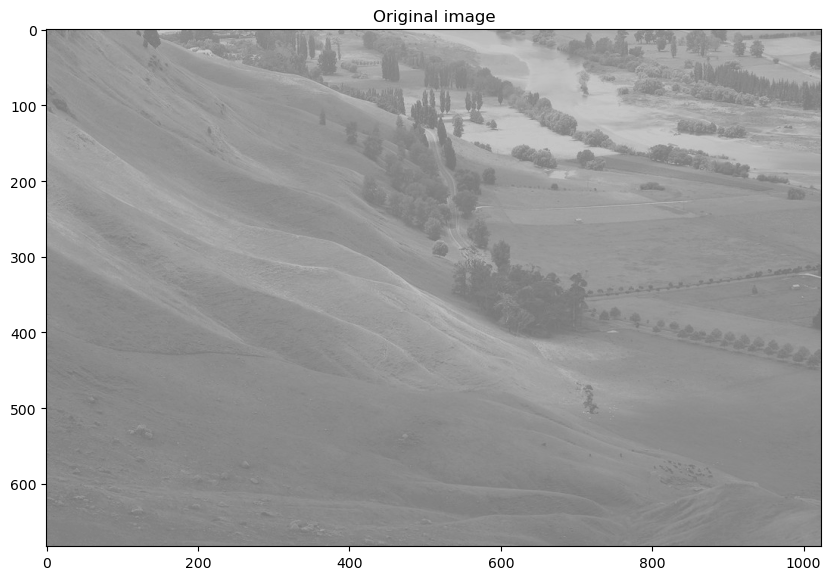

In [3]:
# read as grayscale
I = cv2.imread("Unequalized_Hawkes_Bay_NZ.jpg", 0)

plt.figure(figsize=figsize)
plt.imshow(I, cmap="gray", vmin=0, vmax=255)
plt.title("Original image")
plt.show()


Let's start by calculating and showing the original histogram


In [4]:
bins_edges_min_max = [0, 256]
num_bins = 256
bin_count, bins_edges = np.histogram(I, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]


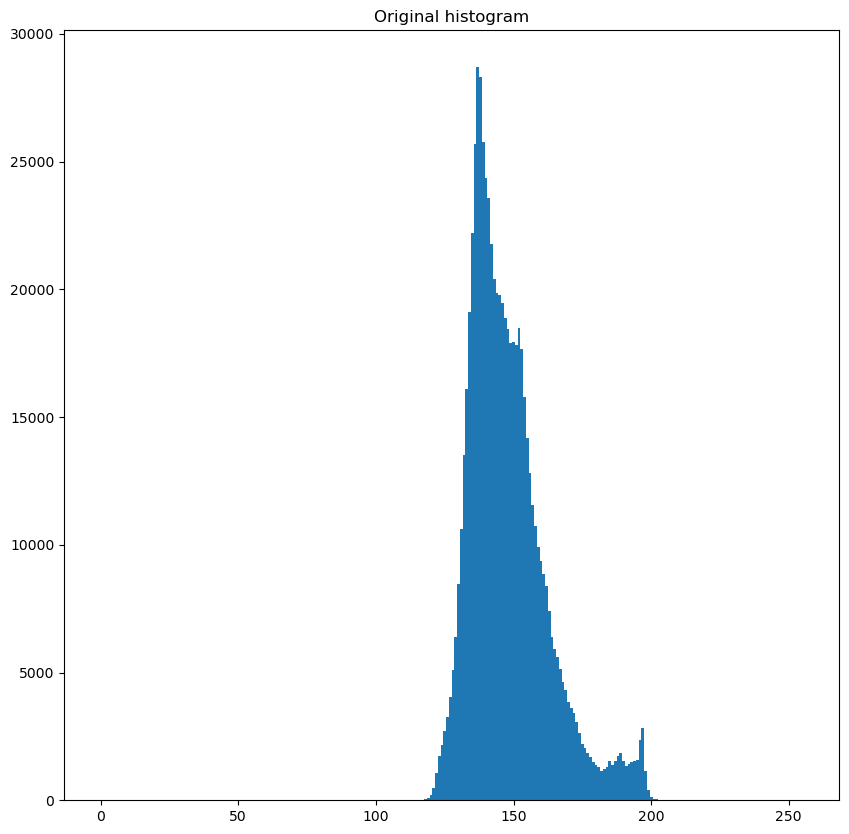

In [5]:
def draw_hist(x_axis, input):
    fig, ax = plt.subplots(figsize=figsize)
    # why not using plt.hist? because we want to plot also some derivations of this hist, so this is easier
    plt.bar(x_axis, input, width=input.shape[0] / (x_axis[-1] - x_axis[0] + 1))
    return fig, ax


draw_hist(bins_start, bin_count)
plt.title("Original histogram")
plt.show()



Normalize the histogram to gat a discrete PDF


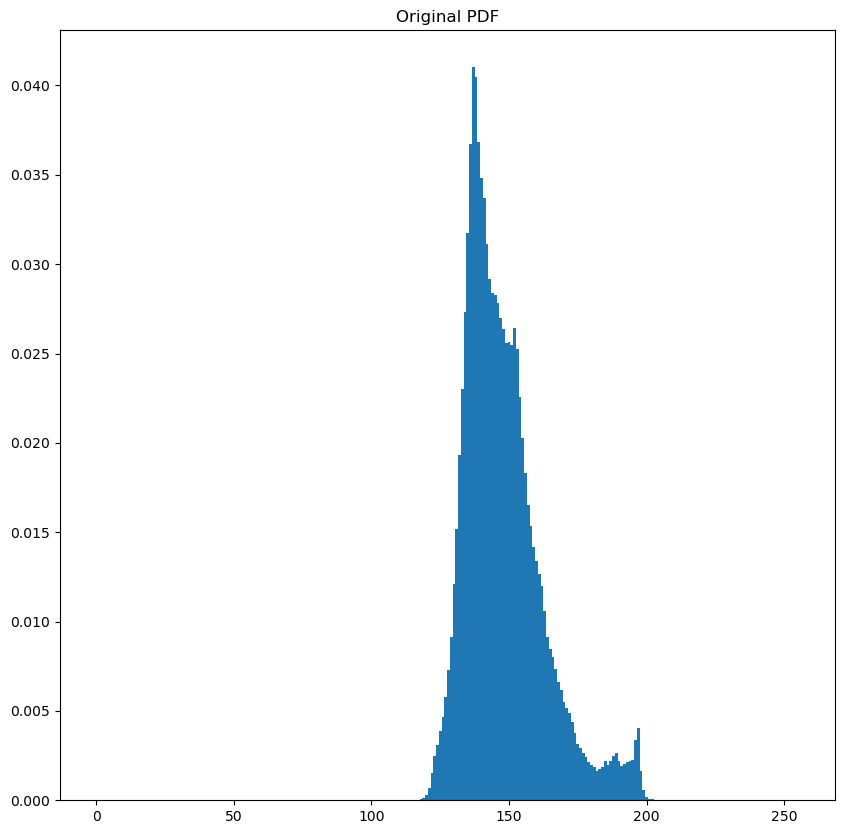

In [6]:
pdf = bin_count / np.sum(bin_count)

draw_hist(bins_start, pdf)
plt.title("Original PDF")
plt.show()



Get the CDF by calculating the cumulative sum of the pdf data


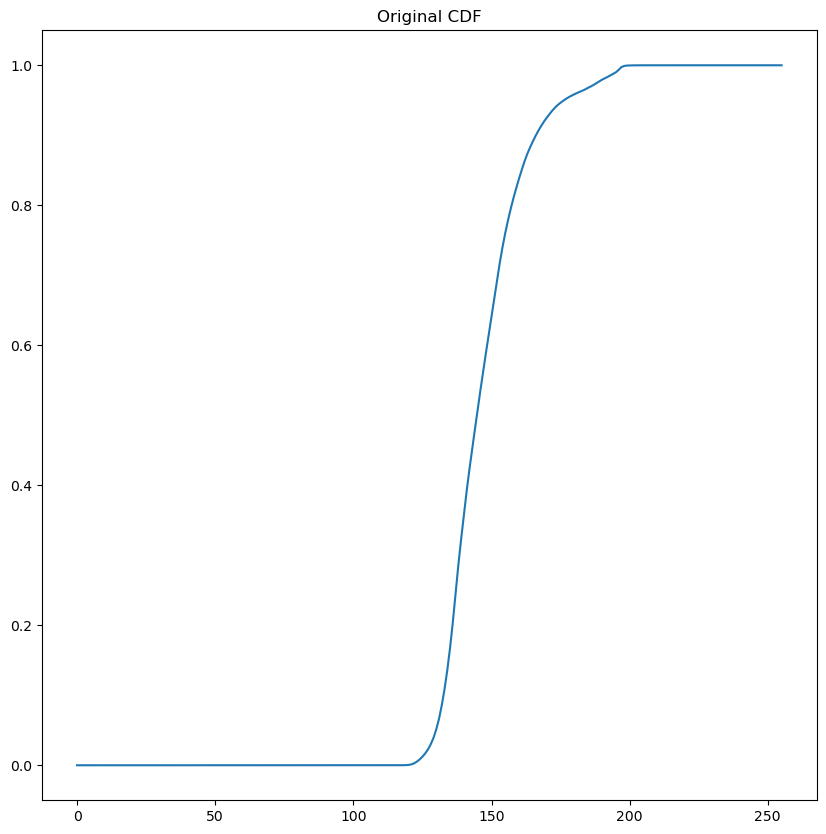

In [7]:
cdf = np.cumsum(pdf)

plt.figure(figsize=figsize)
plt.plot(cdf)
plt.title("Original CDF")
plt.show()



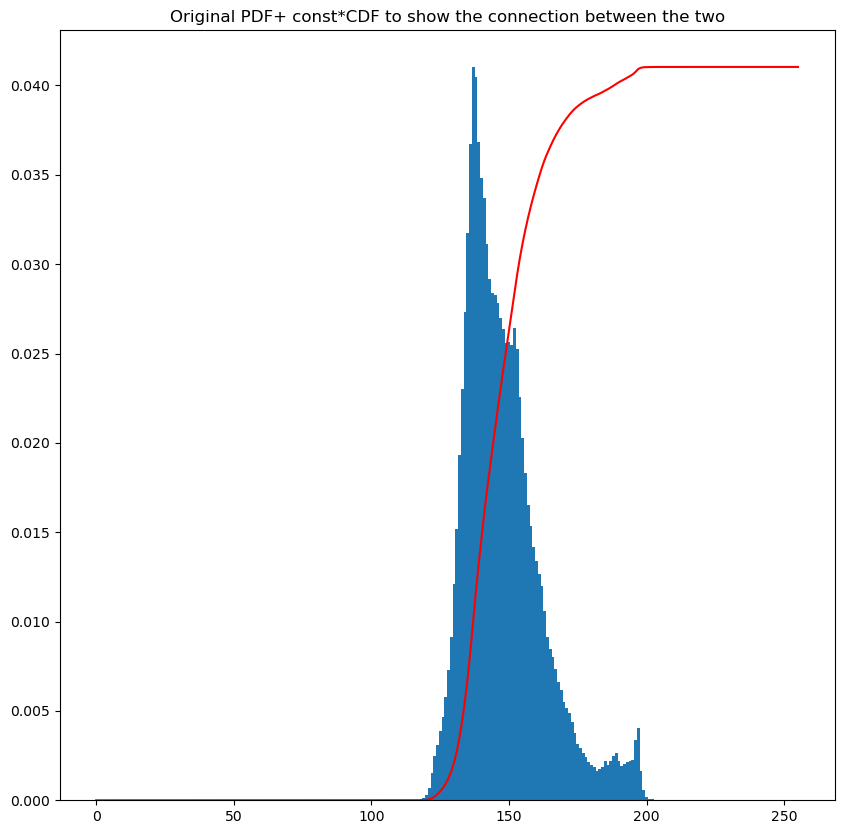

In [8]:
fig, ax = draw_hist(bins_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("Original PDF+ const*CDF to show the connection between the two")
plt.show()



The final step is to un-normalize the CDF to become the equalization function


In [9]:
f_eq = np.round(cdf * 255).astype(int)

f_eq


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   1,   2,   3,   4,   6,   8,  10,
        13,  17,  22,  28,  35,  43,  52,  63,  73,  82,  91, 100, 108,
       115, 122, 130, 137, 144, 150, 157, 163, 170, 177, 183, 189, 194,
       199, 203, 207, 210, 214, 217, 220, 223, 225, 227, 229, 231, 233,
       235, 236, 237, 238, 240, 241, 241, 242, 243, 243, 244, 24

Use the equalization function to get the equalized image


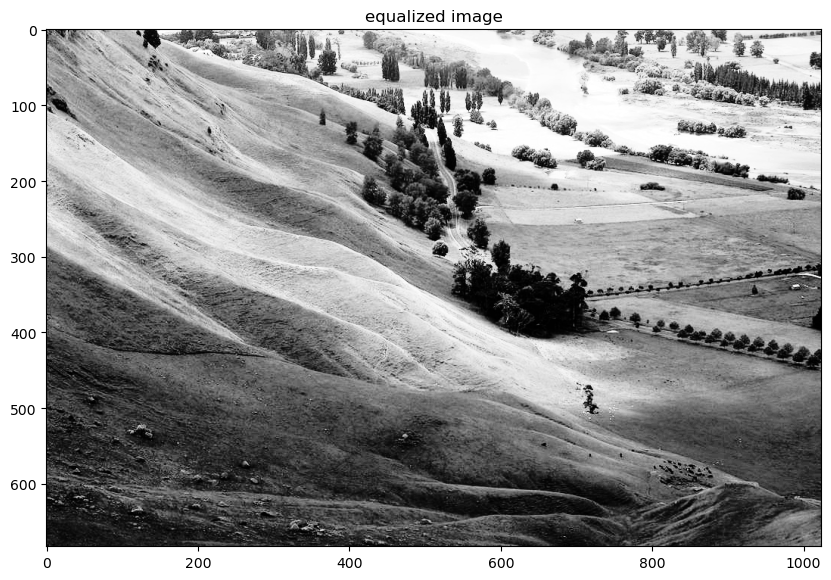

In [10]:
I_eq = f_eq[I]

plt.figure(figsize=figsize)
plt.imshow(I_eq, cmap="gray", vmin=0, vmax=255)
plt.title("equalized image")
plt.show()



Plot the equalized histogram, PDF and CDF


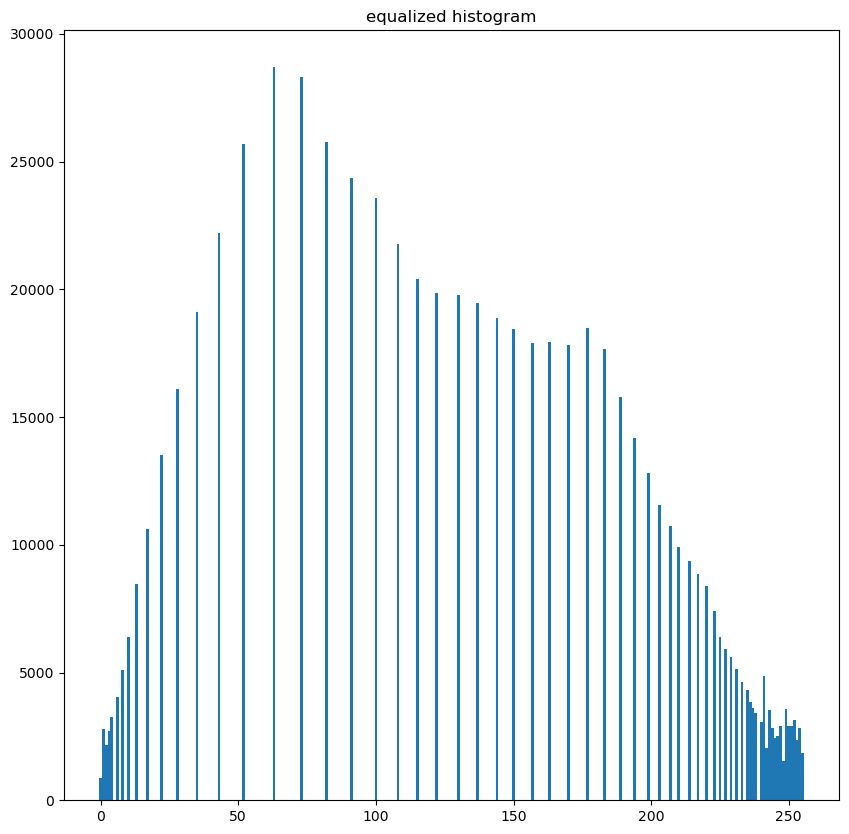

In [11]:
bin_count, bins_edges = np.histogram(I_eq, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]

draw_hist(bins_start, bin_count)
plt.title("equalized histogram")
plt.show()



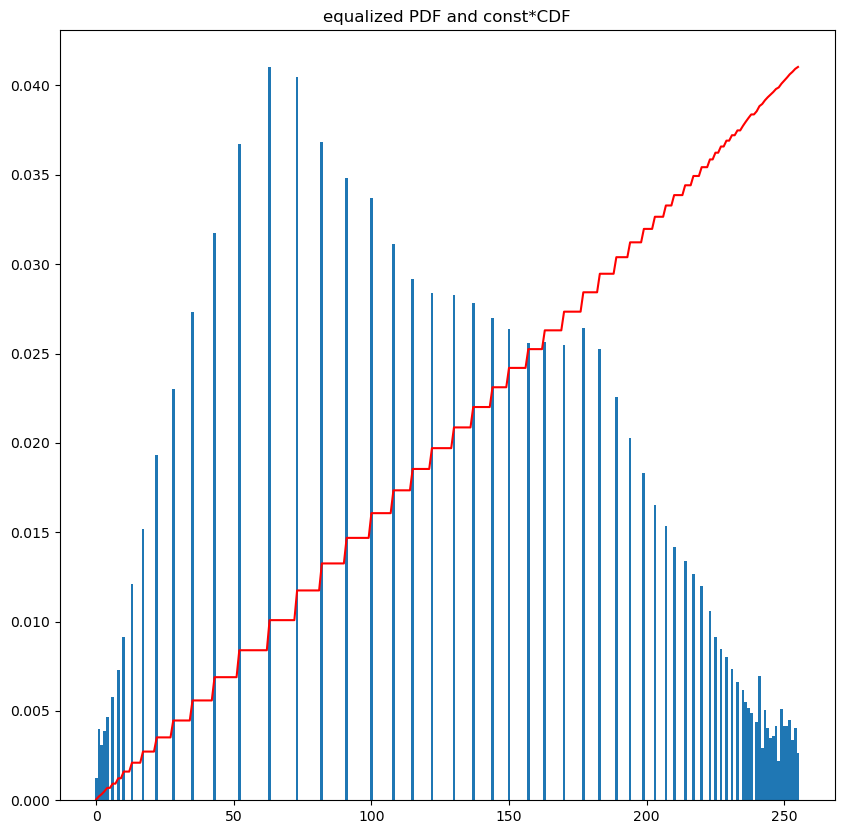

In [12]:
pdf = bin_count / np.sum(bin_count)
cdf = np.cumsum(pdf)

fig, ax = draw_hist(bins_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("equalized PDF and const*CDF")
plt.show()



## cv2 histogram equalization function


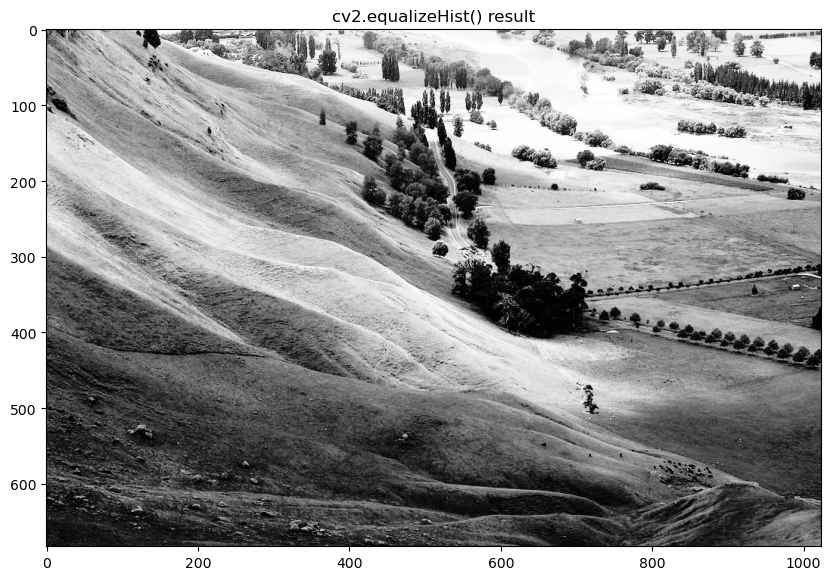

In [13]:
I_eq_cv2 = cv2.equalizeHist(I)

plt.figure(figsize=figsize)
plt.imshow(I_eq_cv2, cmap="gray", vmin=0, vmax=255)
plt.title("cv2.equalizeHist() result")
plt.show()

